# Compute Connectome Harmonics

In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
from pathlib import Path

# Dynamically set the working directory to the project root
project_root = Path.cwd().parent.parent
os.chdir(project_root)

sys.path.append(os.path.join(os.getcwd(), 'src'))

from ch.settings import load_settings

settings = load_settings()
print(settings.camcan_raw)

from pathlib import Path
from ch.settings import load_settings
from ch.data_handling.io import load_matlab_file, get_nets_and_ages, backup_dataframe

settings = load_settings()
# settings.ensure_dirs()
camcan_raw = settings.camcan_raw 
settings, camcan_raw

# Load your processed data
from ch.data_handling.data_utils import load_metadata, load_connectivity_simple
metadata = load_metadata(settings.metadata_parquet)


data/raw/raw_data_nhw2022-network-harmonics-data.mat


In [2]:
metadata.head()

,age
subject_id,
1,24
2,28
3,28
4,23
5,22


In [5]:
# Fix the column alignment issue with metadata.info()
import pandas as pd

# Set pandas display options for better formatting
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Now display the info with proper alignment
print("Metadata Info:")
metadata.info()

print("\n" + "="*50)
print("Metadata Shape:", metadata.shape)
print("="*50)

# Also show a preview of the data
print("\nFirst few rows:")
metadata.head()

Metadata Info:
<class 'pandas.core.frame.DataFrame'>
Index: 594 entries, 1 to 594
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     594 non-null    uint8
dtypes: uint8(1)
memory usage: 5.2 KB

Metadata Shape: (594, 1)

First few rows:


,age
subject_id,
1,24
2,28
3,28
4,23
5,22


In [ ]:
d = load_matlab_file(camcan_raw)
print(sorted(k for k in d.keys() if not k.startswith("__")))
for k in ["nets", "age", "eigs", "laplacian", "connectivity", "harmonics"]:

    if k in d:
        v = d[k]
        try:
            print(k, "shape:", v.shape)
        except Exception:
            print(k, type(v))

nets shape: (376, 376, 594)
ages shape: (594,)
(376, 376, 594)


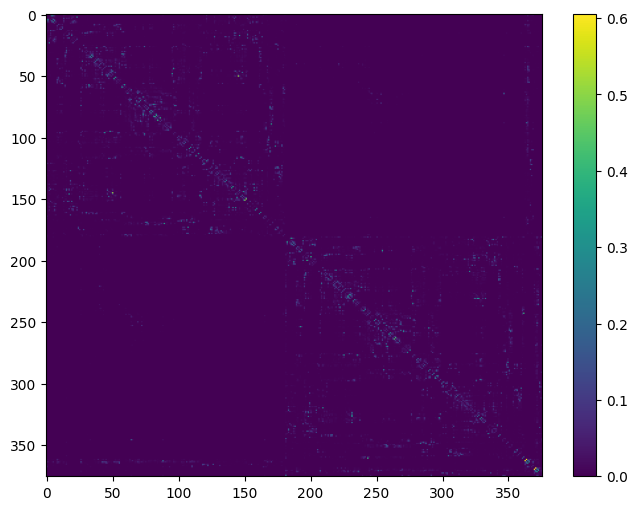

In [11]:
nets, ages = get_nets_and_ages(camcan_raw)
print("nets shape:", getattr(nets, "shape", None))
print("ages shape:", getattr(ages, "shape", None))
assert getattr(nets, "ndim", 0) >= 2, "Expected 2D-ish nets array"
assert getattr(ages, "ndim", 0) == 1, "Expected 1D ages array"

from src.ch.viz.viz import plot_heatmap

print(nets.shape)

plot_heatmap(nets[:,:,500])


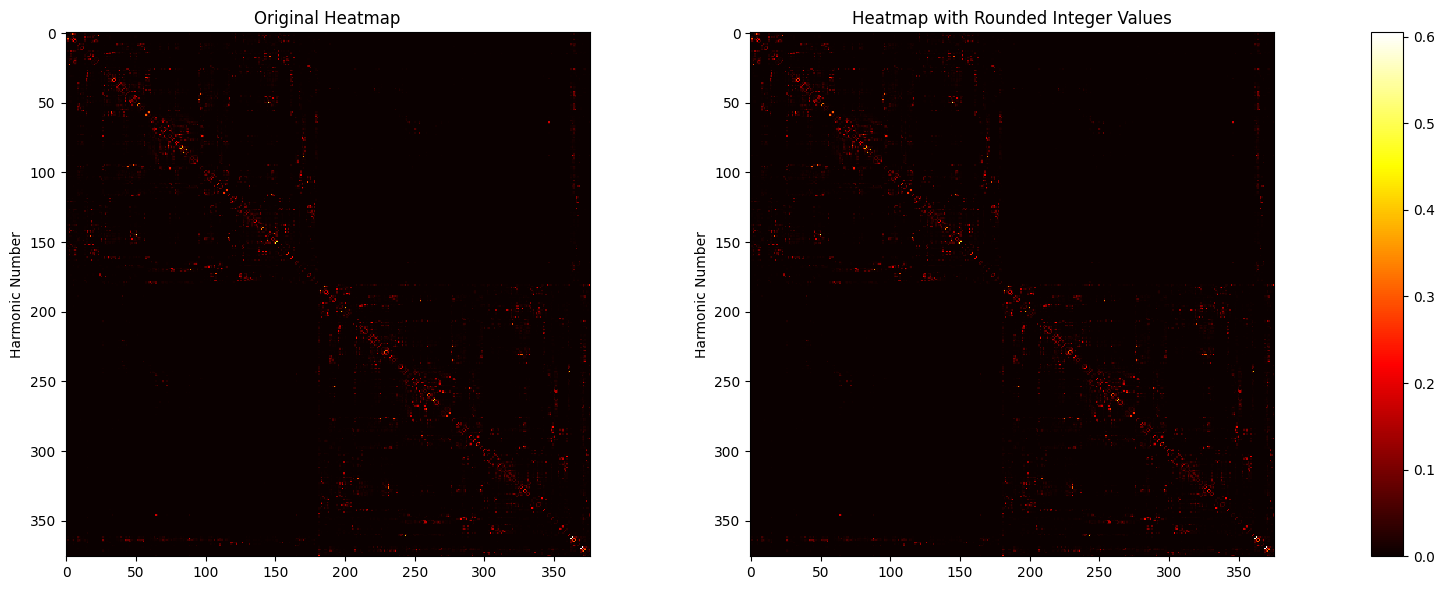

In [18]:
import matplotlib.pyplot as plt
import numpy as np


def visualize_matrix(matrix):
    
    # num_rows = params['num_harmonics'] 

    # matrix = matrix[:num_rows, :num_rows]

    fig, axs = plt.subplots(1, 3, figsize=(15, 6), gridspec_kw={'width_ratios': [1, 1, 0.05]})

    # Original heatmap
    im = axs[0].imshow(matrix, cmap='hot', interpolation='nearest')
    axs[0].set_title('Original Heatmap')
    axs[0].set_ylabel('Harmonic Number')
    # axs[0].set_xticks(range(num_rows))
    # axs[0].set_yticks(range(num_rows))
    # axs[0].set_xticklabels(range(num_rows), rotation=90)
    # axs[0].set_yticklabels(range(num_rows))

    # Heatmap with rounded integer values
    im2 = axs[1].imshow(matrix, cmap='hot', interpolation='nearest')
    axs[1].set_title('Heatmap with Rounded Integer Values')
    axs[1].set_ylabel('Harmonic Number')
    # axs[1].set_xticks(range(num_rows))
    # axs[1].set_yticks(range(num_rows))
    # axs[1].set_xticklabels(range(num_rows), rotation=90)
    # axs[1].set_yticklabels(range(num_rows))

    # Annotate each cell with the rounded integer value
    # for i in range(num_rows):
    #     for j in range(num_rows):
    #         axs[1].text(j, i, f'{matrix[i, j]:.0f}', ha='center', va='center', color='c')  # Cyan color for better visibility

    # plt.suptitle(params['caption'], fontsize=14)
    # plt.figtext(0.5, 0.01, params['subtitle'], fontsize=14, ha='center', va='center')

    # Position the colorbar to the right of the heatmaps
    fig.colorbar(im, cax=axs[2], orientation='vertical')

    plt.tight_layout()
    plt.show()


visualize_matrix(nets[:,:,500])

In [10]:
# Load your processed data
from ch.data_handling.data_utils import load_metadata, load_connectivity_simple

metadata = load_metadata(settings.metadata_parquet)
connectivity = load_connectivity_simple(settings.connectivity_parquet)

print(f"✅ Metadata: {metadata.shape}")
print(f"✅ Connectivity: {connectivity.shape}")
print(f"✅ Data type: {connectivity.dtype}")

# Get a subject's connectivity matrix
subject_conn = connectivity[0]  # First subject
print(f"✅ Subject 1 matrix: {subject_conn.shape}")

FileNotFoundError: [Errno 2] No such file or directory: 'data/metadata/subject_metadata.parquet'

Metadata Info:
<class 'pandas.core.frame.DataFrame'>
Index: 594 entries, 1 to 594
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     594 non-null    uint8
dtypes: uint8(1)
memory usage: 5.2 KB

Metadata Shape: (594, 1)

First few rows:


,age
subject_id,
1,24
2,28
3,28
4,23
5,22


In [15]:

metadata

,age
subject_id,
1,24
2,28
3,28
4,23
5,22
...,...
590,79
591,79
592,79


In [ ]:
# FIX METADATA: Restore all original columns
from ch.data_handling.io import get_nets_and_ages
import pandas as pd

print("🔄 Restoring full metadata...")

# Load raw data to get the correct number of subjects
nets, ages = get_nets_and_ages(settings.camcan_raw)
n_subjects = len(ages)

# Create full metadata DataFrame with all original columns
metadata = pd.DataFrame({
    'subject_id': range(1, n_subjects + 1),
    'age': ages.flatten(),
    'dataset': 'camcan',
    'scan_type': 'DTI',
    'n_regions': 376,
    'has_yeo_labels': True
})
metadata.set_index('subject_id', inplace=True)

# Save metadata
metadata_path = settings.metadata_parquet
metadata.to_parquet(metadata_path)
print(f"✅ Restored full metadata: {metadata_path}")
print(f"   Columns: {list(metadata.columns)}")
print(f"   Shape: {metadata.shape}")

# Show the restored metadata
print("\nRestored metadata:")
metadata.head()
